In [1]:
import os
os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES'] = '2'

In [2]:
import torch

In [3]:
import numpy as np
import cv2
import torch
#from google.colab.patches import cv2_imshow

# import some common detectron2 utiliti

In [4]:
cd ..

/home/kgh6784/private/project/instance_segmentation


In [5]:
cd mmdetection

/home/kgh6784/private/project/instance_segmentation/mmdetection


In [6]:
import mmcv
import terminaltables
import pycocotools
from pycocotools.coco import COCO
from mmdet.datasets.builder import DATASETS
from mmdet.datasets import build_dataset
from mmdet.datasets.coco import CocoDataset
from mmdet.models import build_detector
from mmdet.apis import train_detector
from mmdet.apis import init_detector, inference_detector
from mmdet.apis import show_result_pyplot
from mmcv.runner import load_checkpoint
from mmdet.apis import set_random_seed
import mmcv

import torch
import pylab
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# from requests import get 

# def download(url, file_name):
#     with open(file_name, "wb") as file:   
#         response = get(url)               
#         file.write(response.content)


# url = "https://download.openmmlab.com/mmdetection/v2.0/mask2former/mask2former_r101_lsj_8x2_50e_coco/mask2former_r101_lsj_8x2_50e_coco_20220426_100250-c50b6fa6.pth"
# download(url,"mask2former_r101_lsj_8x2_50e_coco_20220426_100250-c50b6fa6.pth")

In [ ]:
dataset_path = '/home/kgh6784/shared/hdd_ext/nvme1/jihun_instance/lg_molecular/dataset'

In [ ]:
#https://download.openmmlab.com/mmdetection/v2.0/mask2former/mask2former_r101_lsj_8x2_50e_coco/mask2former_r101_lsj_8x2_50e_coco_20220426_100250-c50b6fa6.pth

In [ ]:
'./mask2former_r50_lsj_8x2_50e_coco.py'

In [ ]:
https://download.openmmlab.com/mmdetection/v2.0/mask2former/mask2former_r101_lsj_8x2_50e_coco/mask2former_r101_lsj_8x2_50e_coco_20220426_100250.log.json

In [ ]:
#MODEL.SEM_SEG_HEAD.NUM_CLASSES
cfg.model. #.sem_seg_head

In [36]:
# 사용할 모데 초기 py 설정
config = './configs/mask2former/mask2former_r101_lsj_8x2_50e_coco.py'

# config 불러오기
cfg = mmcv.Config.fromfile(config)

In [37]:
print(f'Config:\n{cfg.pretty_text}')

Config:
dataset_type = 'CocoDataset'
data_root = 'data/coco/'
img_norm_cfg = dict(
    mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375], to_rgb=True)
train_pipeline = [
    dict(type='LoadImageFromFile', to_float32=True),
    dict(type='LoadAnnotations', with_bbox=True, with_mask=True),
    dict(type='RandomFlip', flip_ratio=0.5),
    dict(
        type='Resize',
        img_scale=(1024, 1024),
        ratio_range=(0.1, 2.0),
        multiscale_mode='range',
        keep_ratio=True),
    dict(
        type='RandomCrop',
        crop_size=(1024, 1024),
        crop_type='absolute',
        recompute_bbox=True,
        allow_negative_crop=True),
    dict(
        type='FilterAnnotations', min_gt_bbox_wh=(1e-05, 1e-05), by_mask=True),
    dict(
        type='Pad',
        size=(1024, 1024),
        pad_val=dict(img=(128, 128, 128), masks=0, seg=255)),
    dict(
        type='Normalize',
        mean=[123.675, 116.28, 103.53],
        std=[58.395, 57.12, 57.375],
        to_rgb=

In [58]:
# 사용할 모데 초기 py 설정
config = './configs/mask2former/mask2former_r101_lsj_8x2_50e_coco.py'

# config 불러오기
cfg = mmcv.Config.fromfile(config)

# 데이터셋 지정
cfg.dataset_type = 'CocoDataset'

# data_root는 사용자가 저장한 데이터가 있는 폴더 전까지
data_root = '/home/kgh6784/shared/hdd_ext/nvme1/jihun_instance/lg_molecular/dataset/'

# class 설정
cfg.classes = ('Normal',)

cfg.num_classes = 1
cfg.num_things_classes = 1
cfg.data_root = data_root 

# train, val, test 데이터셋에 대한 type, data_root, ann_file, img_prefix 설정

cfg.data.samples_per_gpu=2
cfg.data.workers_per_gpu=2

cfg.data.train.data_root = data_root 
cfg.data.train.ann_file = 'modify2.json' 
#cfg.data.train.ann_file = 'label(polygon)_train.json' 
cfg.data.train.img_prefix = 'train/'
cfg.data.train.classes = cfg.classes
cfg.data.train.ann_file = 'modify2.json' 
cfg.data.val.data_root = data_root
#cfg.data.val.ann_file = 'label(polygon)_train.json'

cfg.data.val.img_prefix = 'train/'
cfg.data.val.classes = cfg.classes
cfg.data.val.ann_file = 'modify2.json' 
cfg.data.test.data_root = data_root
cfg.data.test.ann_file = 'test.json'
cfg.data.test.img_prefix = 'test/'
cfg.data.test.classes = cfg.classes
# 클래스 수 지정
cfg.model.panoptic_head.num_things_classes=1
cfg.model.panoptic_head.num_stuff_classes=0
cfg.model.panoptic_fusion_head.num_things_classes = 1
cfg.model.panoptic_fusion_head.num_stuff_classes = 0
# cfg.model.roi_head.bbox_head.num_classes = 1
# cfg.model.roi_head.mask_head.num_classes = 1

cfg.model.panoptic_head.loss_cls.class_weight = [1.0, 0.1]
# 사전 훈련 모델 지정
cfg.load_from = './mask2former_r101_lsj_8x2_50e_coco_20220426_100250-c50b6fa6.pth'
#cfg.resume_from = './work_dirs/lg_cfg2/epoch_10.pth'
# 가중치 저장 위치
cfg.work_dir = './work_dirs/lg_cfg2_m2r101/'

# learning rate
cfg.optimizer.lr = 0.02 / 8

# 로그 출력 시기 설정
cfg.log_config.interval = 1 
cfg.lr_config.policy = 'step'

# 평가 지표로 설정
cfg.evaluation.metric = ['segm']

# 평가 구간 설정

cfg.evaluation.interval = 10

# 체크포인트 구간 설정
cfg.checkpoint_config.interval = 10

# epoch 설정
cfg.runner = dict(type='EpochBasedRunner', max_epochs=20)
cfg.runner.max_epochs = 1
# 결과 재현을 위한 시드값 설정
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)
cfg.device='cuda'
cfg.model.test_cfg.instance_on=True
cfg.model.test_cfg.iou_thr=0.5
# cfg.interval = 260
# cfg.workflow = [('train', 260)]

In [8]:
#!pip install --upgrade mmcv-1.4.5

In [ ]:
# !pip install mmcv-full==1.3.9 -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html
# #pip install mmcv-full=={mmcv_version} -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html

In [59]:
print(f'Config:\n{cfg.pretty_text}')

Config:
dataset_type = 'CocoDataset'
data_root = '/home/kgh6784/shared/hdd_ext/nvme1/jihun_instance/lg_molecular/dataset/'
img_norm_cfg = dict(
    mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375], to_rgb=True)
train_pipeline = [
    dict(type='LoadImageFromFile', to_float32=True),
    dict(type='LoadAnnotations', with_bbox=True, with_mask=True),
    dict(type='RandomFlip', flip_ratio=0.5),
    dict(
        type='Resize',
        img_scale=(1024, 1024),
        ratio_range=(0.1, 2.0),
        multiscale_mode='range',
        keep_ratio=True),
    dict(
        type='RandomCrop',
        crop_size=(1024, 1024),
        crop_type='absolute',
        recompute_bbox=True,
        allow_negative_crop=True),
    dict(
        type='FilterAnnotations', min_gt_bbox_wh=(1e-05, 1e-05), by_mask=True),
    dict(
        type='Pad',
        size=(1024, 1024),
        pad_val=dict(img=(128, 128, 128), masks=0, seg=255)),
    dict(
        type='Normalize',
        mean=[123.675, 116.28, 

In [20]:
datasets[0]


CocoDataset Train dataset with number of images 520, and instance counts: 
+------------+-------+----------+-------+----------+-------+----------+-------+----------+-------+
| category   | count | category | count | category | count | category | count | category | count |
+------------+-------+----------+-------+----------+-------+----------+-------+----------+-------+
|            |       |          |       |          |       |          |       |          |       |
| 0 [Normal] | 32148 |          |       |          |       |          |       |          |       |
+------------+-------+----------+-------+----------+-------+----------+-------+----------+-------+

In [60]:
datasets = [build_dataset(cfg.data.train)]
model = build_detector(cfg.model)
model.CLASSES = datasets[0].CLASSES

# 훈련
train_detector(model, datasets, cfg, distributed=False, validate=True)

loading annotations into memory...
Done (t=1.39s)
creating index...
index created!


2022-07-13 12:12:09,621 - mmdet - INFO - Automatic scaling of learning rate (LR) has been disabled.


loading annotations into memory...


2022-07-13 12:12:10,480 - mmdet - INFO - load checkpoint from local path: ./mask2former_r101_lsj_8x2_50e_coco_20220426_100250-c50b6fa6.pth


Done (t=0.70s)
creating index...
index created!


2022-07-13 12:12:10,807 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for panoptic_head.cls_embed.weight: copying a param with shape torch.Size([81, 256]) from checkpoint, the shape in current model is torch.Size([2, 256]).
size mismatch for panoptic_head.cls_embed.bias: copying a param with shape torch.Size([81]) from checkpoint, the shape in current model is torch.Size([2]).
2022-07-13 12:12:10,810 - mmdet - INFO - Start running, host: kgh6784@kghdock, work_dir: /home/kgh6784/private/project/instance_segmentation/mmdetection/work_dirs/lg_cfg2_m2r101
2022-07-13 12:12:10,811 - mmdet - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) StepLrUpdaterHook                  
(NORMAL      ) CheckpointHook                     
(LOW         ) EvalHook                           
(VERY_LOW    ) TextLoggerHook                     
(VERY_LOW    ) TensorboardLoggerHook              
 -------------------- 
before_train_epoch:
(V

2022-07-13 12:12:22,653 - mmdet - INFO - Iter [7/260]	lr: 2.500e-04, eta: 0:07:07, time: 0.998, data_time: 0.371, memory: 18696, loss_cls: 2.5098, loss_mask: 1.0012, loss_dice: 4.8922, d0.loss_cls: 0.7530, d0.loss_mask: 1.1089, d0.loss_dice: 4.7969, d1.loss_cls: 1.4584, d1.loss_mask: 1.1409, d1.loss_dice: 4.8367, d2.loss_cls: 3.3731, d2.loss_mask: 1.6549, d2.loss_dice: 4.7541, d3.loss_cls: 4.3867, d3.loss_mask: 0.6460, d3.loss_dice: 4.8634, d4.loss_cls: 1.4011, d4.loss_mask: 0.8014, d4.loss_dice: 4.9272, d5.loss_cls: 1.1691, d5.loss_mask: 0.7397, d5.loss_dice: 4.9348, d6.loss_cls: 2.6101, d6.loss_mask: 0.6488, d6.loss_dice: 4.9263, d7.loss_cls: 2.9927, d7.loss_mask: 0.7452, d7.loss_dice: 4.9346, d8.loss_cls: 2.1401, d8.loss_mask: 0.8001, d8.loss_dice: 4.9316, loss: 80.8788, grad_norm: 114.3745
2022-07-13 12:12:23,331 - mmdet - INFO - Iter [8/260]	lr: 2.500e-04, eta: 0:06:34, time: 0.679, data_time: 0.015, memory: 18696, loss_cls: 0.9402, loss_mask: 0.2463, loss_dice: 4.9310, d0.loss_cl

2022-07-13 12:12:41,641 - mmdet - INFO - Iter [18/260]	lr: 2.500e-04, eta: 0:06:54, time: 1.334, data_time: 0.565, memory: 18696, loss_cls: 0.7705, loss_mask: 0.3392, loss_dice: 4.8765, d0.loss_cls: 0.5070, d0.loss_mask: 0.2748, d0.loss_dice: 4.2531, d1.loss_cls: 0.7467, d1.loss_mask: 0.3005, d1.loss_dice: 4.9375, d2.loss_cls: 0.6168, d2.loss_mask: 0.4874, d2.loss_dice: 4.5466, d3.loss_cls: 0.8479, d3.loss_mask: 0.2924, d3.loss_dice: 4.9301, d4.loss_cls: 0.6334, d4.loss_mask: 0.3960, d4.loss_dice: 4.7653, d5.loss_cls: 0.7329, d5.loss_mask: 0.4211, d5.loss_dice: 4.6747, d6.loss_cls: 0.6618, d6.loss_mask: 0.3534, d6.loss_dice: 4.8625, d7.loss_cls: 0.7864, d7.loss_mask: 0.3360, d7.loss_dice: 4.8853, d8.loss_cls: 0.7767, d8.loss_mask: 0.3598, d8.loss_dice: 4.8411, loss: 58.2136, grad_norm: 35.3071
2022-07-13 12:12:42,800 - mmdet - INFO - Iter [19/260]	lr: 2.500e-04, eta: 0:06:45, time: 1.160, data_time: 0.437, memory: 18696, loss_cls: 0.8506, loss_mask: 0.3253, loss_dice: 4.9159, d0.loss_c

2022-07-13 12:13:01,641 - mmdet - INFO - Iter [29/260]	lr: 2.500e-04, eta: 0:06:44, time: 1.185, data_time: 0.373, memory: 18696, loss_cls: 0.4508, loss_mask: 0.3437, loss_dice: 4.8527, d0.loss_cls: 0.4305, d0.loss_mask: 0.2736, d0.loss_dice: 4.5884, d1.loss_cls: 0.4533, d1.loss_mask: 0.4242, d1.loss_dice: 4.7255, d2.loss_cls: 0.4595, d2.loss_mask: 0.3530, d2.loss_dice: 4.8314, d3.loss_cls: 0.4614, d3.loss_mask: 0.5303, d3.loss_dice: 4.6213, d4.loss_cls: 0.4653, d4.loss_mask: 0.4391, d4.loss_dice: 4.6940, d5.loss_cls: 0.4847, d5.loss_mask: 0.4543, d5.loss_dice: 4.6765, d6.loss_cls: 0.4485, d6.loss_mask: 0.3014, d6.loss_dice: 4.8933, d7.loss_cls: 0.4785, d7.loss_mask: 0.3120, d7.loss_dice: 4.8888, d8.loss_cls: 0.4740, d8.loss_mask: 0.3573, d8.loss_dice: 4.8364, loss: 56.0037, grad_norm: 16.0231
2022-07-13 12:13:03,011 - mmdet - INFO - Saving checkpoint at 30 iterations
2022-07-13 12:13:09,620 - mmdet - INFO - Iter [30/260]	lr: 2.500e-04, eta: 0:07:30, time: 7.979, data_time: 0.502, memo

2022-07-13 12:13:21,579 - mmdet - INFO - Saving checkpoint at 40 iterations
2022-07-13 12:13:27,787 - mmdet - INFO - Iter [40/260]	lr: 2.500e-04, eta: 0:07:03, time: 7.433, data_time: 0.414, memory: 18696, loss_cls: 0.5161, loss_mask: 0.4190, loss_dice: 4.8835, d0.loss_cls: 0.3503, d0.loss_mask: 0.3124, d0.loss_dice: 4.4401, d1.loss_cls: 0.6606, d1.loss_mask: 0.3893, d1.loss_dice: 4.9071, d2.loss_cls: 0.5818, d2.loss_mask: 0.4141, d2.loss_dice: 4.8894, d3.loss_cls: 0.6161, d3.loss_mask: 0.3855, d3.loss_dice: 4.9078, d4.loss_cls: 0.6031, d4.loss_mask: 0.4202, d4.loss_dice: 4.8854, d5.loss_cls: 0.5811, d5.loss_mask: 0.4190, d5.loss_dice: 4.8830, d6.loss_cls: 0.5675, d6.loss_mask: 0.4384, d6.loss_dice: 4.8598, d7.loss_cls: 0.5867, d7.loss_mask: 0.4259, d7.loss_dice: 4.8784, d8.loss_cls: 0.5633, d8.loss_mask: 0.4369, d8.loss_dice: 4.8684, loss: 58.0901, grad_norm: 48.0740
2022-07-13 12:13:29,749 - mmdet - INFO - Iter [41/260]	lr: 2.500e-04, eta: 0:07:01, time: 1.961, data_time: 0.417, memo

2022-07-13 12:13:46,957 - mmdet - INFO - Iter [50/260]	lr: 2.500e-04, eta: 0:06:43, time: 7.897, data_time: 0.603, memory: 18696, loss_cls: 0.6356, loss_mask: 0.0793, loss_dice: 3.7570, d0.loss_cls: 0.3078, d0.loss_mask: 0.0991, d0.loss_dice: 3.5065, d1.loss_cls: 0.5211, d1.loss_mask: 0.0765, d1.loss_dice: 3.7529, d2.loss_cls: 0.4098, d2.loss_mask: 0.0871, d2.loss_dice: 3.6626, d3.loss_cls: 0.4344, d3.loss_mask: 0.0792, d3.loss_dice: 3.7255, d4.loss_cls: 0.4638, d4.loss_mask: 0.0761, d4.loss_dice: 3.7880, d5.loss_cls: 0.5002, d5.loss_mask: 0.0753, d5.loss_dice: 3.7920, d6.loss_cls: 0.4628, d6.loss_mask: 0.0924, d6.loss_dice: 3.6856, d7.loss_cls: 0.4854, d7.loss_mask: 0.0825, d7.loss_dice: 3.7988, d8.loss_cls: 0.5735, d8.loss_mask: 0.0783, d8.loss_dice: 3.7719, loss: 42.8612, grad_norm: 44.5895
2022-07-13 12:13:48,028 - mmdet - INFO - Iter [51/260]	lr: 2.500e-04, eta: 0:06:38, time: 1.072, data_time: 0.316, memory: 18696, loss_cls: 0.7508, loss_mask: 0.4053, loss_dice: 4.8444, d0.loss_c

2022-07-13 12:14:05,757 - mmdet - INFO - Iter [61/260]	lr: 2.500e-04, eta: 0:06:14, time: 1.051, data_time: 0.348, memory: 18696, loss_cls: 0.8316, loss_mask: 0.7973, loss_dice: 4.7078, d0.loss_cls: 0.5838, d0.loss_mask: 0.3358, d0.loss_dice: 4.4684, d1.loss_cls: 0.7710, d1.loss_mask: 0.7999, d1.loss_dice: 4.7224, d2.loss_cls: 1.0265, d2.loss_mask: 0.8642, d2.loss_dice: 4.6552, d3.loss_cls: 0.9484, d3.loss_mask: 0.7860, d3.loss_dice: 4.6860, d4.loss_cls: 0.9781, d4.loss_mask: 0.9190, d4.loss_dice: 4.6106, d5.loss_cls: 0.8624, d5.loss_mask: 0.7964, d5.loss_dice: 4.7247, d6.loss_cls: 0.9064, d6.loss_mask: 0.8051, d6.loss_dice: 4.6486, d7.loss_cls: 0.8740, d7.loss_mask: 0.8107, d7.loss_dice: 4.6930, d8.loss_cls: 0.8329, d8.loss_mask: 0.8124, d8.loss_dice: 4.6740, loss: 62.9328, grad_norm: 39.3103
2022-07-13 12:14:06,677 - mmdet - INFO - Iter [62/260]	lr: 2.500e-04, eta: 0:06:09, time: 0.920, data_time: 0.278, memory: 18696, loss_cls: 0.9498, loss_mask: 0.5507, loss_dice: 4.8901, d0.loss_c

2022-07-13 12:14:24,639 - mmdet - INFO - Iter [72/260]	lr: 2.500e-04, eta: 0:05:49, time: 1.232, data_time: 0.456, memory: 18696, loss_cls: 0.6108, loss_mask: 0.3601, loss_dice: 3.4166, d0.loss_cls: 0.4865, d0.loss_mask: 0.1509, d0.loss_dice: 3.3935, d1.loss_cls: 0.6789, d1.loss_mask: 0.4119, d1.loss_dice: 3.6203, d2.loss_cls: 0.5822, d2.loss_mask: 0.3136, d2.loss_dice: 3.5282, d3.loss_cls: 0.5727, d3.loss_mask: 0.3731, d3.loss_dice: 3.5692, d4.loss_cls: 0.5796, d4.loss_mask: 0.3515, d4.loss_dice: 3.6154, d5.loss_cls: 0.5927, d5.loss_mask: 0.3758, d5.loss_dice: 3.6999, d6.loss_cls: 0.5740, d6.loss_mask: 0.3105, d6.loss_dice: 3.5777, d7.loss_cls: 0.5726, d7.loss_mask: 0.3598, d7.loss_dice: 3.4766, d8.loss_cls: 0.6022, d8.loss_mask: 0.3703, d8.loss_dice: 3.6381, loss: 44.7651, grad_norm: 21.8070
2022-07-13 12:14:25,859 - mmdet - INFO - Iter [73/260]	lr: 2.500e-04, eta: 0:05:45, time: 1.219, data_time: 0.438, memory: 18696, loss_cls: 0.5898, loss_mask: 0.4683, loss_dice: 4.3507, d0.loss_c

2022-07-13 12:14:42,786 - mmdet - INFO - Iter [83/260]	lr: 2.500e-04, eta: 0:05:24, time: 1.014, data_time: 0.275, memory: 18696, loss_cls: 0.7459, loss_mask: 0.8987, loss_dice: 4.4481, d0.loss_cls: 0.4292, d0.loss_mask: 0.3921, d0.loss_dice: 4.3170, d1.loss_cls: 0.6667, d1.loss_mask: 0.8568, d1.loss_dice: 4.5377, d2.loss_cls: 0.6666, d2.loss_mask: 0.9362, d2.loss_dice: 4.4744, d3.loss_cls: 0.7095, d3.loss_mask: 0.9536, d3.loss_dice: 4.4070, d4.loss_cls: 0.7902, d4.loss_mask: 0.9743, d4.loss_dice: 4.4001, d5.loss_cls: 0.7035, d5.loss_mask: 0.8928, d5.loss_dice: 4.5264, d6.loss_cls: 0.7221, d6.loss_mask: 0.9306, d6.loss_dice: 4.5258, d7.loss_cls: 0.6887, d7.loss_mask: 0.9153, d7.loss_dice: 4.5000, d8.loss_cls: 0.7215, d8.loss_mask: 0.9171, d8.loss_dice: 4.4540, loss: 60.1019, grad_norm: 37.4886
2022-07-13 12:14:44,142 - mmdet - INFO - Iter [84/260]	lr: 2.500e-04, eta: 0:05:21, time: 1.357, data_time: 0.549, memory: 18696, loss_cls: 0.5578, loss_mask: 0.0376, loss_dice: 2.5113, d0.loss_c

2022-07-13 12:15:01,936 - mmdet - INFO - Iter [94/260]	lr: 2.500e-04, eta: 0:05:02, time: 0.987, data_time: 0.301, memory: 18696, loss_cls: 0.9217, loss_mask: 0.7413, loss_dice: 4.3682, d0.loss_cls: 0.5795, d0.loss_mask: 0.3225, d0.loss_dice: 4.3000, d1.loss_cls: 1.0010, d1.loss_mask: 0.7328, d1.loss_dice: 4.4040, d2.loss_cls: 0.8933, d2.loss_mask: 0.7593, d2.loss_dice: 4.3886, d3.loss_cls: 0.9328, d3.loss_mask: 0.7598, d3.loss_dice: 4.4426, d4.loss_cls: 1.0045, d4.loss_mask: 0.7510, d4.loss_dice: 4.3795, d5.loss_cls: 0.8739, d5.loss_mask: 0.7473, d5.loss_dice: 4.4382, d6.loss_cls: 0.8860, d6.loss_mask: 0.7429, d6.loss_dice: 4.3771, d7.loss_cls: 0.8916, d7.loss_mask: 0.7653, d7.loss_dice: 4.3961, d8.loss_cls: 0.9013, d8.loss_mask: 0.7385, d8.loss_dice: 4.4539, loss: 59.8947, grad_norm: 38.2000
2022-07-13 12:15:03,264 - mmdet - INFO - Iter [95/260]	lr: 2.500e-04, eta: 0:04:59, time: 1.328, data_time: 0.464, memory: 18696, loss_cls: 0.4504, loss_mask: 0.3027, loss_dice: 4.2762, d0.loss_c

2022-07-13 12:15:21,119 - mmdet - INFO - Iter [105/260]	lr: 2.500e-04, eta: 0:04:40, time: 1.179, data_time: 0.395, memory: 18696, loss_cls: 0.5722, loss_mask: 0.3580, loss_dice: 4.9264, d0.loss_cls: 0.3492, d0.loss_mask: 0.3445, d0.loss_dice: 4.4924, d1.loss_cls: 0.5793, d1.loss_mask: 0.3469, d1.loss_dice: 4.9306, d2.loss_cls: 0.6018, d2.loss_mask: 0.4329, d2.loss_dice: 4.8673, d3.loss_cls: 0.5939, d3.loss_mask: 0.3642, d3.loss_dice: 4.9238, d4.loss_cls: 0.5855, d4.loss_mask: 0.3630, d4.loss_dice: 4.9270, d5.loss_cls: 0.5984, d5.loss_mask: 0.3561, d5.loss_dice: 4.9293, d6.loss_cls: 0.5807, d6.loss_mask: 0.4214, d6.loss_dice: 4.8823, d7.loss_cls: 0.5942, d7.loss_mask: 0.3652, d7.loss_dice: 4.9224, d8.loss_cls: 0.5782, d8.loss_mask: 0.3680, d8.loss_dice: 4.9215, loss: 58.0765, grad_norm: 16.7180
2022-07-13 12:15:22,318 - mmdet - INFO - Iter [106/260]	lr: 2.500e-04, eta: 0:04:38, time: 1.200, data_time: 0.422, memory: 18696, loss_cls: 0.5674, loss_mask: 0.2755, loss_dice: 4.8208, d0.loss

2022-07-13 12:15:40,514 - mmdet - INFO - Iter [116/260]	lr: 2.500e-04, eta: 0:04:20, time: 1.396, data_time: 0.511, memory: 18696, loss_cls: 0.3929, loss_mask: 0.1498, loss_dice: 3.4824, d0.loss_cls: 0.3555, d0.loss_mask: 0.1267, d0.loss_dice: 2.9447, d1.loss_cls: 0.4285, d1.loss_mask: 0.1526, d1.loss_dice: 3.3046, d2.loss_cls: 0.3593, d2.loss_mask: 0.1203, d2.loss_dice: 3.6089, d3.loss_cls: 0.4775, d3.loss_mask: 0.1422, d3.loss_dice: 3.4365, d4.loss_cls: 0.4923, d4.loss_mask: 0.1486, d4.loss_dice: 3.5252, d5.loss_cls: 0.4803, d5.loss_mask: 0.1676, d5.loss_dice: 3.2770, d6.loss_cls: 0.6712, d6.loss_mask: 0.1288, d6.loss_dice: 3.4613, d7.loss_cls: 0.4958, d7.loss_mask: 0.1270, d7.loss_dice: 3.4133, d8.loss_cls: 0.5612, d8.loss_mask: 0.1653, d8.loss_dice: 3.2581, loss: 39.8555, grad_norm: 49.5943
2022-07-13 12:15:41,784 - mmdet - INFO - Iter [117/260]	lr: 2.500e-04, eta: 0:04:17, time: 1.274, data_time: 0.449, memory: 18696, loss_cls: 0.4554, loss_mask: 0.3175, loss_dice: 3.9287, d0.loss

2022-07-13 12:16:00,112 - mmdet - INFO - Iter [127/260]	lr: 2.500e-04, eta: 0:04:00, time: 0.972, data_time: 0.350, memory: 18696, loss_cls: 1.7912, loss_mask: 1.2343, loss_dice: 4.4205, d0.loss_cls: 0.8227, d0.loss_mask: 0.3198, d0.loss_dice: 4.3764, d1.loss_cls: 0.6477, d1.loss_mask: 0.7445, d1.loss_dice: 4.3191, d2.loss_cls: 0.5701, d2.loss_mask: 0.9755, d2.loss_dice: 4.6046, d3.loss_cls: 1.2716, d3.loss_mask: 1.4281, d3.loss_dice: 4.4758, d4.loss_cls: 1.3159, d4.loss_mask: 1.3788, d4.loss_dice: 4.3605, d5.loss_cls: 1.2322, d5.loss_mask: 1.3056, d5.loss_dice: 4.4398, d6.loss_cls: 1.1225, d6.loss_mask: 1.4068, d6.loss_dice: 4.2918, d7.loss_cls: 1.1831, d7.loss_mask: 1.5228, d7.loss_dice: 4.4592, d8.loss_cls: 1.2099, d8.loss_mask: 1.2800, d8.loss_dice: 4.4457, loss: 66.9564, grad_norm: 55.3131
2022-07-13 12:16:31,973 - mmdet - INFO - Iter [128/260]	lr: 2.500e-04, eta: 0:04:29, time: 31.860, data_time: 0.417, memory: 18696, loss_cls: 0.8379, loss_mask: 0.5850, loss_dice: 4.6906, d0.los

2022-07-13 12:16:50,370 - mmdet - INFO - Iter [138/260]	lr: 2.500e-04, eta: 0:04:07, time: 1.422, data_time: 0.565, memory: 18696, loss_cls: 0.4015, loss_mask: 0.4152, loss_dice: 4.7197, d0.loss_cls: 0.3793, d0.loss_mask: 0.3038, d0.loss_dice: 4.6520, d1.loss_cls: 0.3815, d1.loss_mask: 0.3374, d1.loss_dice: 4.5911, d2.loss_cls: 0.4090, d2.loss_mask: 0.2805, d2.loss_dice: 4.5993, d3.loss_cls: 0.4012, d3.loss_mask: 0.3979, d3.loss_dice: 4.7485, d4.loss_cls: 0.4120, d4.loss_mask: 0.3752, d4.loss_dice: 4.7252, d5.loss_cls: 0.4074, d5.loss_mask: 0.4287, d5.loss_dice: 4.6787, d6.loss_cls: 0.4388, d6.loss_mask: 0.3118, d6.loss_dice: 4.8010, d7.loss_cls: 0.4067, d7.loss_mask: 0.3491, d7.loss_dice: 4.7823, d8.loss_cls: 0.4345, d8.loss_mask: 0.3598, d8.loss_dice: 4.7384, loss: 54.6673, grad_norm: 25.1400
2022-07-13 12:16:51,446 - mmdet - INFO - Iter [139/260]	lr: 2.500e-04, eta: 0:04:04, time: 1.075, data_time: 0.419, memory: 18696, loss_cls: 0.9814, loss_mask: 0.3895, loss_dice: 4.9199, d0.loss

2022-07-13 12:17:08,920 - mmdet - INFO - Iter [149/260]	lr: 2.500e-04, eta: 0:03:42, time: 1.302, data_time: 0.556, memory: 18696, loss_cls: 0.6354, loss_mask: 0.5125, loss_dice: 4.6742, d0.loss_cls: 0.3853, d0.loss_mask: 0.2932, d0.loss_dice: 4.3761, d1.loss_cls: 0.2300, d1.loss_mask: 0.3661, d1.loss_dice: 4.3434, d2.loss_cls: 0.4335, d2.loss_mask: 0.3218, d2.loss_dice: 4.6486, d3.loss_cls: 0.6235, d3.loss_mask: 0.3815, d3.loss_dice: 4.8864, d4.loss_cls: 0.6547, d4.loss_mask: 0.3722, d4.loss_dice: 4.9013, d5.loss_cls: 0.5720, d5.loss_mask: 0.4666, d5.loss_dice: 4.4946, d6.loss_cls: 0.6467, d6.loss_mask: 0.4573, d6.loss_dice: 4.7943, d7.loss_cls: 0.7349, d7.loss_mask: 0.3083, d7.loss_dice: 4.8872, d8.loss_cls: 0.6464, d8.loss_mask: 0.4571, d8.loss_dice: 4.7968, loss: 56.3023, grad_norm: 18.4569
2022-07-13 12:17:09,957 - mmdet - INFO - Saving checkpoint at 150 iterations
2022-07-13 12:17:16,415 - mmdet - INFO - Iter [150/260]	lr: 2.500e-04, eta: 0:03:44, time: 7.495, data_time: 0.301, m

2022-07-13 12:17:37,563 - mmdet - INFO - Saving checkpoint at 160 iterations
2022-07-13 12:17:43,759 - mmdet - INFO - Iter [160/260]	lr: 2.500e-04, eta: 0:03:28, time: 7.127, data_time: 0.277, memory: 18696, loss_cls: 0.9976, loss_mask: 0.5818, loss_dice: 4.8868, d0.loss_cls: 0.5874, d0.loss_mask: 0.3656, d0.loss_dice: 4.4846, d1.loss_cls: 0.8962, d1.loss_mask: 0.5629, d1.loss_dice: 4.6556, d2.loss_cls: 1.4754, d2.loss_mask: 0.5305, d2.loss_dice: 4.5438, d3.loss_cls: 1.0801, d3.loss_mask: 0.4992, d3.loss_dice: 4.8946, d4.loss_cls: 1.0599, d4.loss_mask: 0.4843, d4.loss_dice: 4.4755, d5.loss_cls: 1.0664, d5.loss_mask: 0.4524, d5.loss_dice: 4.9028, d6.loss_cls: 1.0785, d6.loss_mask: 0.5497, d6.loss_dice: 4.8942, d7.loss_cls: 0.9193, d7.loss_mask: 0.6623, d7.loss_dice: 4.8177, d8.loss_cls: 1.0048, d8.loss_mask: 0.5410, d8.loss_dice: 4.9009, loss: 62.8520, grad_norm: 38.8516
2022-07-13 12:17:45,077 - mmdet - INFO - Iter [161/260]	lr: 2.500e-04, eta: 0:03:25, time: 1.317, data_time: 0.471, m

2022-07-13 12:18:21,295 - mmdet - INFO - Iter [170/260]	lr: 2.500e-04, eta: 0:03:16, time: 7.304, data_time: 0.272, memory: 18696, loss_cls: 1.3183, loss_mask: 0.2876, loss_dice: 4.9210, d0.loss_cls: 0.6793, d0.loss_mask: 0.3045, d0.loss_dice: 4.5591, d1.loss_cls: 1.4303, d1.loss_mask: 0.3365, d1.loss_dice: 4.5781, d2.loss_cls: 1.1957, d2.loss_mask: 0.4368, d2.loss_dice: 4.7000, d3.loss_cls: 1.2872, d3.loss_mask: 0.3929, d3.loss_dice: 4.7808, d4.loss_cls: 1.1434, d4.loss_mask: 0.3807, d4.loss_dice: 4.8913, d5.loss_cls: 1.2168, d5.loss_mask: 0.2704, d5.loss_dice: 4.8050, d6.loss_cls: 1.2787, d6.loss_mask: 0.2900, d6.loss_dice: 4.9250, d7.loss_cls: 1.1535, d7.loss_mask: 0.2896, d7.loss_dice: 4.9186, d8.loss_cls: 1.3375, d8.loss_mask: 0.2728, d8.loss_dice: 4.8692, loss: 63.2506, grad_norm: 52.2296
2022-07-13 12:18:22,569 - mmdet - INFO - Iter [171/260]	lr: 2.500e-04, eta: 0:03:13, time: 1.273, data_time: 0.404, memory: 18696, loss_cls: 0.3367, loss_mask: 0.1875, loss_dice: 4.4054, d0.loss

2022-07-13 12:18:40,686 - mmdet - INFO - Iter [181/260]	lr: 2.500e-04, eta: 0:02:50, time: 1.215, data_time: 0.446, memory: 18696, loss_cls: 0.5600, loss_mask: 0.3390, loss_dice: 4.4746, d0.loss_cls: 0.3835, d0.loss_mask: 0.2114, d0.loss_dice: 4.1369, d1.loss_cls: 0.6408, d1.loss_mask: 0.2710, d1.loss_dice: 4.3313, d2.loss_cls: 0.5430, d2.loss_mask: 0.2496, d2.loss_dice: 4.7908, d3.loss_cls: 0.5021, d3.loss_mask: 0.2114, d3.loss_dice: 4.2354, d4.loss_cls: 0.5491, d4.loss_mask: 0.3050, d4.loss_dice: 4.8357, d5.loss_cls: 0.4975, d5.loss_mask: 0.2138, d5.loss_dice: 4.3985, d6.loss_cls: 0.5508, d6.loss_mask: 0.2846, d6.loss_dice: 4.5635, d7.loss_cls: 0.5435, d7.loss_mask: 0.3340, d7.loss_dice: 4.4862, d8.loss_cls: 0.5545, d8.loss_mask: 0.2557, d8.loss_dice: 4.6358, loss: 52.8889, grad_norm: 17.2838
2022-07-13 12:18:41,702 - mmdet - INFO - Iter [182/260]	lr: 2.500e-04, eta: 0:02:47, time: 1.016, data_time: 0.347, memory: 18696, loss_cls: 1.0052, loss_mask: 0.8537, loss_dice: 4.8177, d0.loss

2022-07-13 12:19:18,463 - mmdet - INFO - Iter [192/260]	lr: 2.500e-04, eta: 0:02:31, time: 1.292, data_time: 0.494, memory: 18696, loss_cls: 0.4986, loss_mask: 0.0532, loss_dice: 4.2632, d0.loss_cls: 0.3716, d0.loss_mask: 0.0486, d0.loss_dice: 3.6670, d1.loss_cls: 0.5101, d1.loss_mask: 0.0536, d1.loss_dice: 3.9571, d2.loss_cls: 0.5197, d2.loss_mask: 0.0551, d2.loss_dice: 4.1069, d3.loss_cls: 0.5152, d3.loss_mask: 0.0531, d3.loss_dice: 4.0187, d4.loss_cls: 0.5067, d4.loss_mask: 0.0592, d4.loss_dice: 3.9829, d5.loss_cls: 0.4582, d5.loss_mask: 0.0551, d5.loss_dice: 4.0096, d6.loss_cls: 0.5372, d6.loss_mask: 0.0529, d6.loss_dice: 3.9875, d7.loss_cls: 0.4993, d7.loss_mask: 0.0517, d7.loss_dice: 4.0393, d8.loss_cls: 0.5059, d8.loss_mask: 0.0562, d8.loss_dice: 4.0126, loss: 45.5061, grad_norm: 29.3401
2022-07-13 12:19:51,329 - mmdet - INFO - Iter [193/260]	lr: 2.500e-04, eta: 0:02:39, time: 32.866, data_time: 0.326, memory: 18696, loss_cls: 0.5955, loss_mask: 0.2018, loss_dice: 4.5005, d0.los

2022-07-13 12:20:10,637 - mmdet - INFO - Iter [203/260]	lr: 2.500e-04, eta: 0:02:14, time: 1.091, data_time: 0.355, memory: 18696, loss_cls: 0.6785, loss_mask: 0.1657, loss_dice: 2.8799, d0.loss_cls: 0.4124, d0.loss_mask: 0.1215, d0.loss_dice: 3.0127, d1.loss_cls: 0.6747, d1.loss_mask: 0.1256, d1.loss_dice: 3.0183, d2.loss_cls: 0.6739, d2.loss_mask: 0.1267, d2.loss_dice: 2.9456, d3.loss_cls: 0.7698, d3.loss_mask: 0.1049, d3.loss_dice: 2.9431, d4.loss_cls: 0.6952, d4.loss_mask: 0.1107, d4.loss_dice: 2.8899, d5.loss_cls: 0.6158, d5.loss_mask: 0.1220, d5.loss_dice: 2.8394, d6.loss_cls: 0.5897, d6.loss_mask: 0.1133, d6.loss_dice: 2.9035, d7.loss_cls: 0.6769, d7.loss_mask: 0.1248, d7.loss_dice: 2.9968, d8.loss_cls: 0.6740, d8.loss_mask: 0.1101, d8.loss_dice: 3.0036, loss: 37.1189, grad_norm: 13.2558
2022-07-13 12:20:11,936 - mmdet - INFO - Iter [204/260]	lr: 2.500e-04, eta: 0:02:12, time: 1.299, data_time: 0.535, memory: 18696, loss_cls: 0.5410, loss_mask: 0.4117, loss_dice: 3.5252, d0.loss

2022-07-13 12:20:30,748 - mmdet - INFO - Iter [214/260]	lr: 2.500e-04, eta: 0:01:47, time: 1.504, data_time: 0.653, memory: 18696, loss_cls: 0.4236, loss_mask: 0.1331, loss_dice: 2.6827, d0.loss_cls: 0.4203, d0.loss_mask: 0.0986, d0.loss_dice: 2.5895, d1.loss_cls: 0.3826, d1.loss_mask: 0.0973, d1.loss_dice: 2.7504, d2.loss_cls: 0.3889, d2.loss_mask: 0.0921, d2.loss_dice: 2.8518, d3.loss_cls: 0.3547, d3.loss_mask: 0.1001, d3.loss_dice: 2.7270, d4.loss_cls: 0.3972, d4.loss_mask: 0.1008, d4.loss_dice: 2.9060, d5.loss_cls: 0.3638, d5.loss_mask: 0.0954, d5.loss_dice: 2.6430, d6.loss_cls: 0.3828, d6.loss_mask: 0.1428, d6.loss_dice: 2.5582, d7.loss_cls: 0.4686, d7.loss_mask: 0.0984, d7.loss_dice: 2.7193, d8.loss_cls: 0.3616, d8.loss_mask: 0.0963, d8.loss_dice: 2.7330, loss: 32.1599, grad_norm: 19.2255
2022-07-13 12:20:32,167 - mmdet - INFO - Iter [215/260]	lr: 2.500e-04, eta: 0:01:44, time: 1.419, data_time: 0.618, memory: 18696, loss_cls: 0.5718, loss_mask: 0.4905, loss_dice: 3.9537, d0.loss

2022-07-13 12:21:16,014 - mmdet - INFO - Iter [225/260]	lr: 2.500e-04, eta: 0:01:24, time: 1.448, data_time: 0.638, memory: 18696, loss_cls: 0.4647, loss_mask: 0.2281, loss_dice: 3.3787, d0.loss_cls: 0.2475, d0.loss_mask: 0.1850, d0.loss_dice: 2.8549, d1.loss_cls: 0.3579, d1.loss_mask: 0.1902, d1.loss_dice: 2.9495, d2.loss_cls: 0.4923, d2.loss_mask: 0.2659, d2.loss_dice: 3.1927, d3.loss_cls: 0.5093, d3.loss_mask: 0.2460, d3.loss_dice: 3.2222, d4.loss_cls: 0.4624, d4.loss_mask: 0.2210, d4.loss_dice: 3.2701, d5.loss_cls: 0.4804, d5.loss_mask: 0.2180, d5.loss_dice: 3.2233, d6.loss_cls: 0.4906, d6.loss_mask: 0.3814, d6.loss_dice: 3.1013, d7.loss_cls: 0.4623, d7.loss_mask: 0.2466, d7.loss_dice: 3.2655, d8.loss_cls: 0.5283, d8.loss_mask: 0.2280, d8.loss_dice: 3.3129, loss: 38.6768, grad_norm: 14.4648
2022-07-13 12:21:17,133 - mmdet - INFO - Iter [226/260]	lr: 2.500e-04, eta: 0:01:22, time: 1.119, data_time: 0.349, memory: 18696, loss_cls: 0.6949, loss_mask: 0.0593, loss_dice: 3.0981, d0.loss

2022-07-13 12:22:39,699 - mmdet - INFO - Iter [236/260]	lr: 2.500e-04, eta: 0:01:03, time: 1.235, data_time: 0.399, memory: 18696, loss_cls: 0.4420, loss_mask: 0.1437, loss_dice: 3.8846, d0.loss_cls: 0.3473, d0.loss_mask: 0.0879, d0.loss_dice: 3.5436, d1.loss_cls: 0.5551, d1.loss_mask: 0.1467, d1.loss_dice: 3.8670, d2.loss_cls: 0.4068, d2.loss_mask: 0.0960, d2.loss_dice: 3.6734, d3.loss_cls: 0.4942, d3.loss_mask: 0.1618, d3.loss_dice: 3.8023, d4.loss_cls: 0.4740, d4.loss_mask: 0.1463, d4.loss_dice: 3.7820, d5.loss_cls: 0.4304, d5.loss_mask: 0.1497, d5.loss_dice: 3.8474, d6.loss_cls: 0.4856, d6.loss_mask: 0.1605, d6.loss_dice: 3.7739, d7.loss_cls: 0.4530, d7.loss_mask: 0.1407, d7.loss_dice: 3.8047, d8.loss_cls: 0.4321, d8.loss_mask: 0.1377, d8.loss_dice: 3.8995, loss: 43.7701, grad_norm: 25.0708
2022-07-13 12:22:40,916 - mmdet - INFO - Iter [237/260]	lr: 2.500e-04, eta: 0:01:01, time: 1.217, data_time: 0.380, memory: 18696, loss_cls: 0.4123, loss_mask: 0.1761, loss_dice: 4.2016, d0.loss

2022-07-13 12:26:04,104 - mmdet - INFO - Iter [247/260]	lr: 2.500e-04, eta: 0:00:43, time: 1.109, data_time: 0.421, memory: 18696, loss_cls: 0.8195, loss_mask: 0.9489, loss_dice: 4.6290, d0.loss_cls: 0.5004, d0.loss_mask: 0.5094, d0.loss_dice: 4.5634, d1.loss_cls: 1.1595, d1.loss_mask: 0.8318, d1.loss_dice: 4.7306, d2.loss_cls: 0.7401, d2.loss_mask: 0.6236, d2.loss_dice: 4.6243, d3.loss_cls: 0.8650, d3.loss_mask: 1.1036, d3.loss_dice: 4.7482, d4.loss_cls: 0.8795, d4.loss_mask: 1.0347, d4.loss_dice: 4.6357, d5.loss_cls: 0.8387, d5.loss_mask: 1.2088, d5.loss_dice: 4.5596, d6.loss_cls: 0.8311, d6.loss_mask: 0.9757, d6.loss_dice: 4.6428, d7.loss_cls: 0.8023, d7.loss_mask: 1.0360, d7.loss_dice: 4.6430, d8.loss_cls: 0.8314, d8.loss_mask: 0.8846, d8.loss_dice: 4.6757, loss: 63.8770, grad_norm: 34.1817
2022-07-13 12:26:05,255 - mmdet - INFO - Iter [248/260]	lr: 2.500e-04, eta: 0:00:40, time: 1.150, data_time: 0.431, memory: 18696, loss_cls: 0.7157, loss_mask: 0.4791, loss_dice: 4.3266, d0.loss

2022-07-13 12:27:19,383 - mmdet - INFO - Iter [258/260]	lr: 2.500e-04, eta: 0:00:07, time: 1.052, data_time: 0.372, memory: 18696, loss_cls: 0.7756, loss_mask: 0.5186, loss_dice: 4.9088, d0.loss_cls: 0.5041, d0.loss_mask: 0.3932, d0.loss_dice: 4.5056, d1.loss_cls: 0.6162, d1.loss_mask: 0.4545, d1.loss_dice: 4.3389, d2.loss_cls: 0.7318, d2.loss_mask: 0.4217, d2.loss_dice: 4.6174, d3.loss_cls: 0.7697, d3.loss_mask: 0.5698, d3.loss_dice: 4.8601, d4.loss_cls: 0.7820, d4.loss_mask: 0.5643, d4.loss_dice: 4.8661, d5.loss_cls: 0.7744, d5.loss_mask: 0.4948, d5.loss_dice: 4.9152, d6.loss_cls: 0.7794, d6.loss_mask: 0.4957, d6.loss_dice: 4.9199, d7.loss_cls: 0.8153, d7.loss_mask: 0.5610, d7.loss_dice: 4.8752, d8.loss_cls: 0.7738, d8.loss_mask: 0.5657, d8.loss_dice: 4.8727, loss: 60.0416, grad_norm: 7.9404
2022-07-13 12:27:20,588 - mmdet - INFO - Iter [259/260]	lr: 2.500e-04, eta: 0:00:03, time: 1.204, data_time: 0.378, memory: 18696, loss_cls: 0.5397, loss_mask: 0.1730, loss_dice: 2.9830, d0.loss_

In [17]:
cfg.CLASSES

AttributeError: 'ConfigDict' object has no attribute 'CLASSES'

In [ ]:
train_detector(model, datasets, cfg, distributed=False, validate=True)

In [ ]:
!python /home/kgh6784/private/project/instance_segmentation/mmdetection/test.py /home/kgh6784/private/project/instance_segmentation/mmdetection/configs/custom/lg_mask-m2f-r101.py /home/kgh6784/private/project/instance_segmentation/mmdetection/work_dirs/lg_cfg2/latest.pth --format-only --eval-options "jsonfile_prefix=/home/kgh6784/private/project/instance_segmentation/mmdetection/work_dirs/lg_cfg2/"

In [ ]:
json_files = '/home/kgh6784/shared/hdd_ext/nvme1/jihun_instance/lg_molecular/dataset/modify.json'

In [ ]:
import json
with open(json_files) as json_file:
    json_data = json.load(json_file)

In [ ]:
for i in range(len(json_data['annotations'])):
    dicts = json_data['annotations'][i]
    dicts['iscrowd'] = dicts.pop('is_crowd')

In [ ]:
with open('/home/kgh6784/shared/hdd_ext/nvme1/jihun_instance/lg_molecular/dataset/modify2.json','w') as f:
    json.dump(json_data, f, ensure_ascii=False, indent=4)

In [ ]:
tt = json_data['annotations'][0].copy()

In [ ]:
tt['is_crowd']

In [ ]:
tt['is_crowd'] = tt.pop('iscrowd')

In [ ]:
ddd = {'a':10, 'b':19}

In [ ]:
ddd['c'] = ddd.pop('a')

In [ ]:
ddd

In [ ]:
train_detector(model, datasets, cfg, distributed=False, validate=True)

In [ ]:
result

In [34]:
model

Mask2Former(
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
       

/home/kgh6784/private/project/instance_segmentation/mmdetection/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(
/home/kgh6784/private/project/instance_segmentation/mmdetection/mmdet/models/seg_heads/panoptic_fusion_heads/maskformer_fusion_head.py:144: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  query_indices = top_indices // self.num_classes


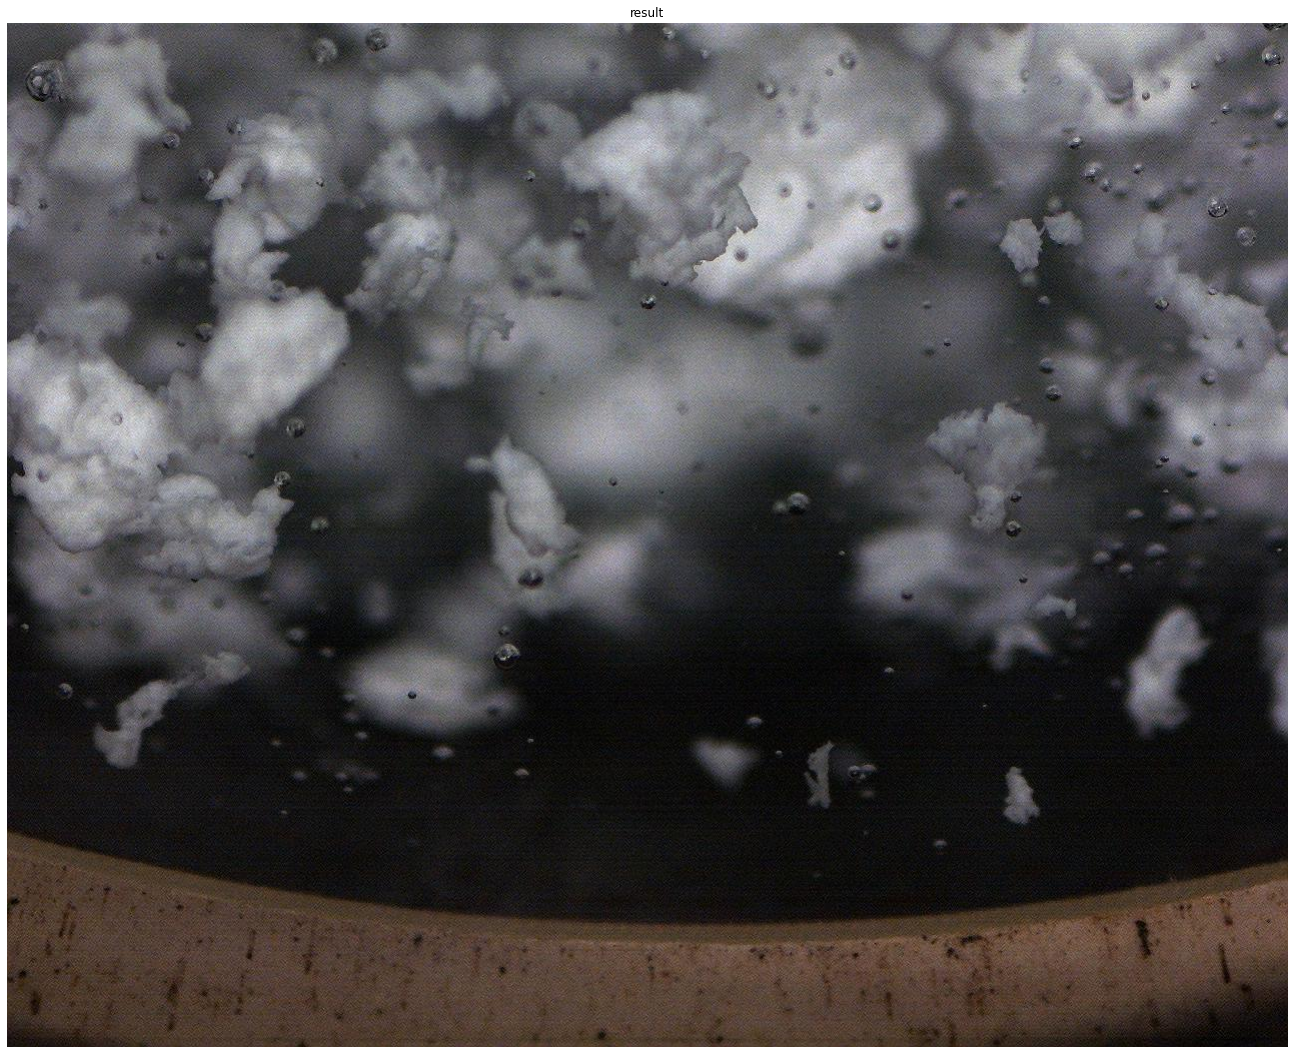

In [61]:
img = mmcv.imread('/home/kgh6784/shared/hdd_ext/nvme1/jihun_instance/lg_molecular/dataset/test/0085.jpg')

model.cfg = cfg
result = inference_detector(model, img)
imgs = show_result_pyplot(model, img, result)
imgs

In [62]:
result

([array([[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
        

In [65]:
# 해당하는 폴더에 예측 json 저장 하는 코드입니다.

!python /home/kgh6784/private/project/instance_segmentation/mmdetection/test.py /home/kgh6784/private/project/instance_segmentation/mmdetection/configs/custom/lg_mask-m2f-r101.py /home/kgh6784/private/project/instance_segmentation/mmdetection/work_dirs/lg_cfg2_m2r101/latest.pth --format-only --eval-options "jsonfile_prefix=/home/kgh6784/private/project/instance_segmentation/mmdetection/work_dirs/lg_cfg2_m2r101/"

/home/kgh6784/private/project/instance_segmentation/mmdetection/mmdet/utils/setup_env.py:38: UserWarning: Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  warnings.warn(
/home/kgh6784/private/project/instance_segmentation/mmdetection/mmdet/utils/setup_env.py:48: UserWarning: Setting MKL_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  warnings.warn(
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Traceback (most recent call last):
  File "/home/kgh6784/.local/lib/python3.8/site-packages/mmcv/utils/registry.py", line 69, in build_from_cfg
    return obj_cls(**args)
TypeError: __init__() got an unexpected keyword argument 'roi_head'

During handli

In [ ]:
cfg.num_classes

In [66]:
mmdet.__version__

NameError: name 'mmdet' is not defined